In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the datasets
steam = pd.read_csv('../raw_data/steam.csv')
steam_description = pd.read_csv('../raw_data/steam_description_data.csv')
steam_media = pd.read_csv('../raw_data/steam_media_data.csv')
steam_requirement = pd.read_csv('../raw_data/steam_requirements_data.csv')
steam_support = pd.read_csv('../raw_data/steam_support_info.csv')
steamspy_tag = pd.read_csv('../raw_data/steamspy_tag_data.csv')

# Initial Examination

In [3]:
steam.head(2)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99


In [4]:
steam_description.head(2)

,steam_appid,detailed_description,about_the_game,short_description
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...


In [5]:
steam_media.head(2)

,steam_appid,header_image,screenshots,background,movies
0,10,https://steamcdn-a.akamaihd.net/steam/apps/10/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,NaN
1,20,https://steamcdn-a.akamaihd.net/steam/apps/20/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/20/...,NaN


In [6]:
steam_requirement.head(2)

,steam_appid,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
0,10,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
1,20,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN


In [7]:
steam_support.head(2)

,steam_appid,website,support_url,support_email
0,10,NaN,http://steamcommunity.com/app/10,NaN
1,30,http://www.dayofdefeat.com/,NaN,NaN


In [8]:
steamspy_tag.head(2)

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA for each dataset

In [9]:
# check for missing values
steam.isna().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

No duplicates in this dataset.

In [10]:
steam.duplicated().sum()

0

In [11]:
steam.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [12]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

Cleaning plan:

`categories`: split into lists

`genres`: split into lists

`owners`: get upper and lower bound, and then the median of them

`release_date`: convert to datetime format

### Split strings into lists

#### `categories`

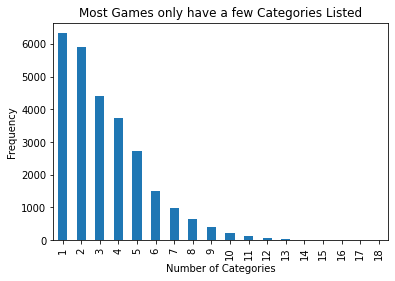

In [13]:
# clean the values into lists
steam['categories'] = steam['categories'].apply(lambda x: x.split(";"))

# number of categories for each game
plt.figure()
steam['categories'].apply(lambda x: len(x)).value_counts().plot(kind = 'bar')
plt.xlabel('Number of Categories')
plt.ylabel('Frequency')
plt.title('Most Games only have a few Categories Listed')
plt.show()

In [14]:
# take a look at the categories
steam['categories']

0        [Multi-player, Online Multi-Player, Local Mult...
1        [Multi-player, Online Multi-Player, Local Mult...
2                 [Multi-player, Valve Anti-Cheat enabled]
3        [Multi-player, Online Multi-Player, Local Mult...
4        [Single-player, Multi-player, Valve Anti-Cheat...
                               ...                        
27070                  [Single-player, Steam Achievements]
27071                                      [Single-player]
27072    [Single-player, Multi-player, Co-op, Shared/Sp...
27073                         [Single-player, Steam Cloud]
27074                         [Single-player, Steam Cloud]
Name: categories, Length: 27075, dtype: object

In [15]:
# write a function to list all existing labels, and include all occurrences in another list
def get_labels(data):
  unique_labels = []
  all_labels = []

  for i in range(len(data)):
    for label in data[i]:
      all_labels.append(label)
      if label not in unique_labels:
        unique_labels.append(label)
  
  print('Number of unique labels:', len(unique_labels))
  print('Number of total labels applied:', len(all_labels))
  
  return unique_labels, all_labels

In [16]:
# list all existing categories, and include all occurrences in another list
unique_cats, all_cats = get_labels(steam['categories'])
unique_cats[:10]

Number of unique labels: 29
Number of total labels applied: 89726


['Multi-player',
 'Online Multi-Player',
 'Local Multi-Player',
 'Valve Anti-Cheat enabled',
 'Single-player',
 'Steam Cloud',
 'Steam Achievements',
 'Steam Trading Cards',
 'Captions available',
 'Partial Controller Support']

Surprisingly, there's only 29 categories applied on 27,000+ games.. 

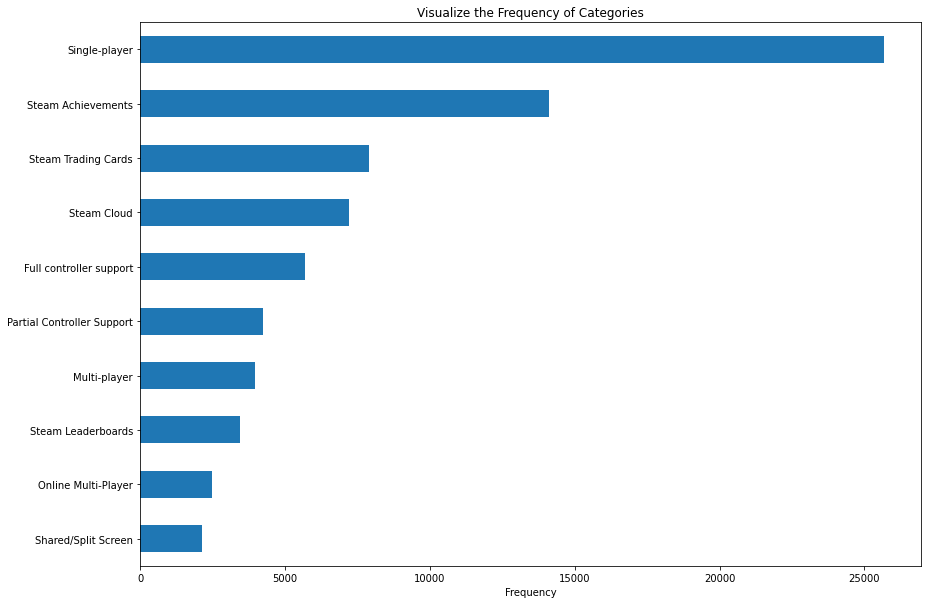

In [17]:
# visualize the top 10 categories
plt.figure(figsize = (14, 10))
pd.Series(all_cats).value_counts()[:10].plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.title('Visualize the Frequency of Categories')
plt.show()

The most popular category is `Single-player`. There's more categories about players: `Multi-player`, `Local Multi-Player`, etc. 

Can we classify the games by the single/multiple player mode?

In [18]:
# encode categories
cats = steam['categories']
cats = cats.apply(lambda x: str(x).strip('[]'))
cats = cats.str.get_dummies(sep=', ')

In [19]:
# clean the column names
col_rename_dict = {}
for col_name in cats.columns:
  col_rename_dict[col_name] = col_name.strip("'")
cats.rename(columns = col_rename_dict, inplace = True)

In [20]:
# filter the categories about player modes
player_cols = [col for col in cats.columns if "layer" in col] # exclude p due to case sensitivity
player_cols

['Cross-Platform Multiplayer',
 'Local Multi-Player',
 'Multi-player',
 'Online Multi-Player',
 'Single-player']

There's one category for single-player games and 4 for multi-player games.

However, the sub-categories of mult-player don't add up to `Multi-player`. 

In [21]:
# multi-player categories 
multi = cats[player_cols[:-1]]

# when Multi-player is 0, other sub-categories could still be 1
multi[multi['Multi-player'] == 0].sum(axis = 0)

Cross-Platform Multiplayer    220
Local Multi-Player            649
Multi-player                    0
Online Multi-Player           728
dtype: int64

In [22]:
# when Multi-player is 1, more than one sub-categories could be 1
multi[multi['Multi-player'] == 1].sum(axis = 1).value_counts()

2    1580
1    1468
3     772
4     154
dtype: int64

Therefore, we'll just combine the sub-categories for multi-player games.

In [23]:
# when one of the multi-player subcategories is 1, the Multi-player column is 1
player_cats = cats[player_cols].copy()
player_cats.loc[(player_cats['Cross-Platform Multiplayer'] == 1) | (player_cats['Local Multi-Player'] == 1) | (player_cats['Online Multi-Player'] == 1), 'Multi-player'] = 1

In [24]:
player_cats = player_cats[['Multi-player', 'Single-player']]
player_cats.sum()

Multi-player      5356
Single-player    25678
dtype: int64

In [25]:
# single player only
s = len(player_cats[(player_cats['Single-player'] == 1) & (player_cats['Multi-player'] == 0)])
s

21464

In [26]:
# single & multi player
s_m = len(player_cats[(player_cats['Single-player'] == 1) & (player_cats['Multi-player'] == 1)])
s_m

4214

In [27]:
# multi player only
m = len(player_cats[(player_cats['Single-player'] == 0) & (player_cats['Multi-player'] == 1)])
m

1142

In [28]:
# no player mode indicated
len(player_cats[(player_cats['Single-player'] == 0) & (player_cats['Multi-player'] == 0)])

255

Very few games have no player mode indicated. They are currently not included in the visualization.

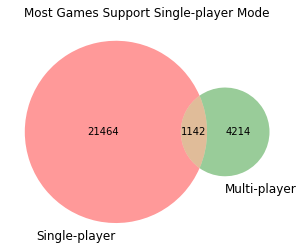

In [29]:
# venn diagram
from matplotlib_venn import venn2 
venn2(subsets = (s, s_m, m), set_labels = ('Single-player', 'Multi-player'))
plt.title('Most Games Support Single-player Mode')
plt.show()

#### `genres`

In [30]:
# clean the values into lists
steam['genres'] = steam['genres'].apply(lambda x: x.split(";"))

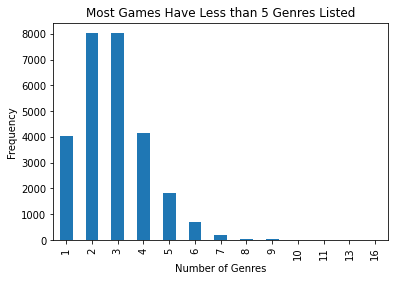

In [31]:
# number of categories for each game
plt.figure()
steam['genres'].apply(lambda x: len(x)).value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Number of Genres')
plt.ylabel('Frequency')
plt.title('Most Games Have Less than 5 Genres Listed')
plt.show()

In [32]:
# list all existing genres, and include all occurrences in another list
unique_genres, all_genres = get_labels(steam['genres'])
unique_genres[:10]

Number of unique labels: 29
Number of total labels applied: 76462


['Action',
 'Free to Play',
 'Strategy',
 'Adventure',
 'Indie',
 'RPG',
 'Animation & Modeling',
 'Video Production',
 'Casual',
 'Simulation']

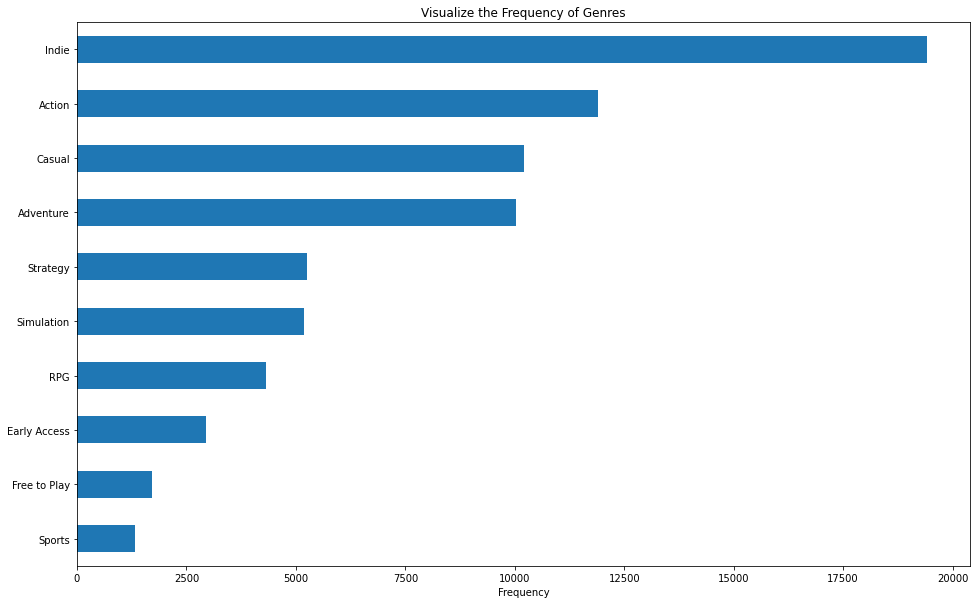

In [33]:
# visualize the genres
plt.figure(figsize = (16, 10))
pd.Series(all_genres).value_counts().head(10).plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.title('Visualize the Frequency of Genres')
plt.show()

#### `owners`

In [34]:
# split the lower and upper bound into a temperatory df
tmp = pd.DataFrame()
tmp[['lower', 'upper']] = steam['owners'].str.split('-', expand = True)
tmp['lower'] = tmp['lower'].astype('int')
tmp['upper'] = tmp['upper'].astype('int')
tmp['owner_median'] = (tmp['lower'] + tmp['upper']) / 2
tmp

,lower,upper,owner_median
0,10000000,20000000,15000000.0
1,5000000,10000000,7500000.0
2,5000000,10000000,7500000.0
3,5000000,10000000,7500000.0
4,5000000,10000000,7500000.0
...,...,...,...
27070,0,20000,10000.0
27071,0,20000,10000.0
27072,0,20000,10000.0
27073,0,20000,10000.0


In [35]:
# insert the owner_median column into steam df
steam['owner_median'] = tmp['owner_median']
steam.head(2)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,owner_median
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,"[Multi-player, Online Multi-Player, Local Mult...",[Action],Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,15000000.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,"[Multi-player, Online Multi-Player, Local Mult...",[Action],Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,7500000.0


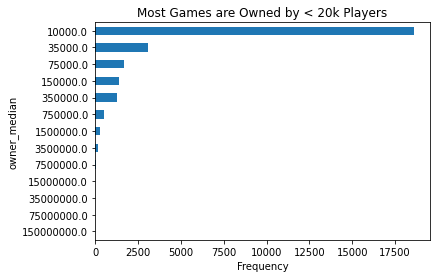

In [36]:
# distribution of owner_median
plt.figure()
steam['owner_median'].value_counts().sort_index().plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.ylabel('owner_median')
plt.title('Most Games are Owned by < 20k Players')
plt.show()

In [37]:
# top games by owners
steam.sort_values(by = 'owner_median', ascending = False).head(6)[['name', 'owner_median']]

,name,owner_median
22,Dota 2,150000000.0
25,Counter-Strike: Global Offensive,75000000.0
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,75000000.0
19,Team Fortress 2,35000000.0
3362,Unturned,35000000.0
1634,Warframe,35000000.0


### `release_date`

In [38]:
# convert release_date to datetime format
steam['release_date'] = steam['release_date'].astype('datetime64')

#### By year

Data gathered in May 2019, so 2019 has incomplete data (unexpectedly low releases).

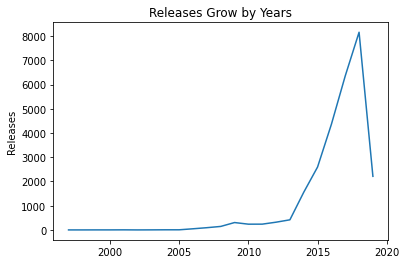

In [39]:
# release date by year
plt.figure()
steam['release_date'].dt.year.value_counts().sort_index().plot(kind = 'line')
plt.ylabel('Releases')
plt.title('Releases Grow by Years')
plt.show()

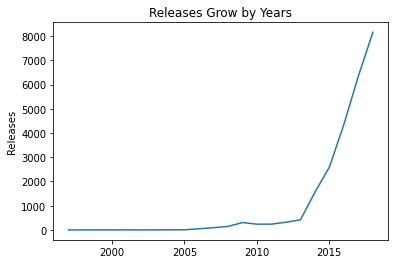

In [40]:
# release date by year, exclude 2019
plt.figure()
steam['release_date'].dt.year.value_counts().sort_index()[:-1].plot(kind = 'line')
plt.ylabel('Releases')
plt.title('Releases Grow by Years')
plt.show()

#### By month

Most games are released around October, while very few games are released in June. 

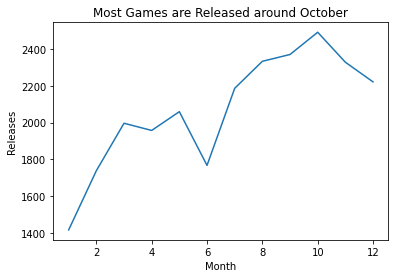

In [41]:
# release date by month, exclude 2019
plt.figure()
steam[steam['release_date'] < '2019-01-01']['release_date'].dt.month.value_counts().sort_index().plot(kind = 'line')
plt.xlabel('Month')
plt.ylabel('Releases')
plt.title('Most Games are Released around October')
plt.show()

#### By trend over time

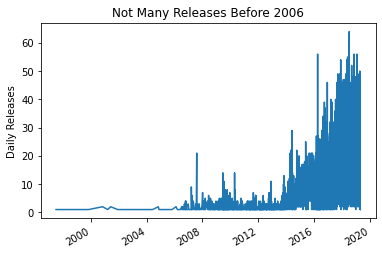

In [42]:
# plot by daily releases over time
release_counts = steam['release_date'].value_counts().sort_index()

plt.figure()
release_counts.plot()
plt.ylabel('Daily Releases')
plt.title('Not Many Releases Before 2006')
plt.show()

Not many releases before 2006.

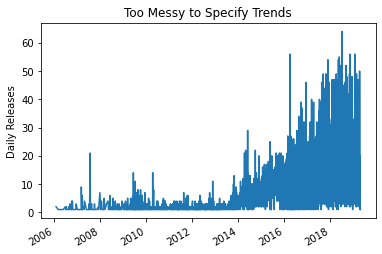

In [43]:
# plot from 2006
plt.figure()
release_counts['2006-01-01':].plot()
plt.ylabel('Daily Releases')
plt.title('Too Messy to Specify Trends')
plt.show()

Too messy! Let's count by year-week.

In [44]:
from datetime import datetime
# reformat the release date to year-week
release_year_week = steam['release_date']
release_year_week = release_year_week.apply(lambda x: x.strftime("%Y-%W"))
release_year_week = release_year_week[release_year_week >= '2006-01'] # start from 2006
release_year_week

12       2010-28
15       2006-18
16       2006-22
17       2007-41
18       2007-41
          ...   
27070    2019-16
27071    2019-16
27072    2019-16
27073    2019-15
27074    2019-16
Name: release_date, Length: 27049, dtype: object

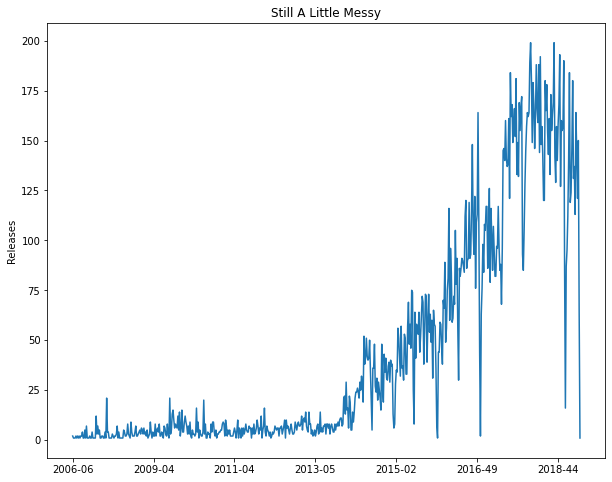

In [45]:
# plot releases by year-week
plt.figure(figsize = (10, 8))
release_year_week.value_counts().sort_index().plot()
plt.ylabel('Releases')
plt.title('Still A Little Messy')
plt.show()

Still a little messy. Let's try year-month.

In [46]:
# reformat the release date
release_year_month = steam['release_date']
release_year_month = release_year_month.apply(lambda x: x.strftime("%Y-%m"))
release_year_month = release_year_month[release_year_month >= '2006-01'] # start from 2006
release_year_month

12       2010-07
15       2006-05
16       2006-06
17       2007-10
18       2007-10
          ...   
27070    2019-04
27071    2019-04
27072    2019-04
27073    2019-04
27074    2019-04
Name: release_date, Length: 27049, dtype: object

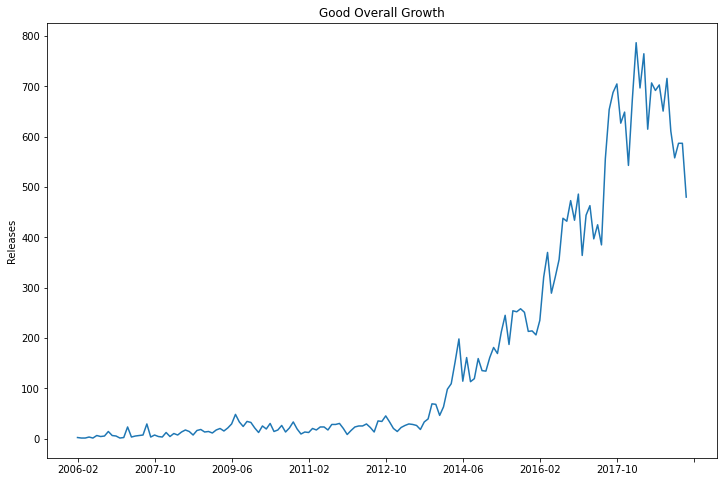

In [47]:
# plot releases by year-month
plt.figure(figsize = (12, 8))
release_year_month.value_counts().sort_index()[:-1].plot() # Exclude the last month since the data was collected before the end of that month.
plt.ylabel('Releases')
plt.title('Good Overall Growth')
plt.show()

This looks good!!

#### highest daily release amount

On 2018-07-13, 64 games were releasedy!

In [48]:
# highest daily release amount
steam['release_date'].value_counts().sort_values(ascending = False).head()

2018-07-13    64
2018-11-16    56
2016-04-05    56
2019-01-31    56
2018-05-31    55
Name: release_date, dtype: int64

### Categorical Columns

Next, we'll look at all the categorical columns together.

In [49]:
# categorical columns
cat_cols = ['english', 'developer', 'publisher', 'required_age']

# required_age is numeric but here it better suits as a categorical column

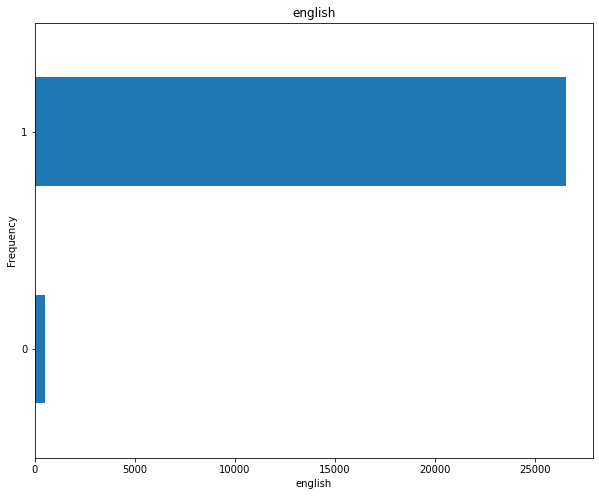

Total number of categories in english: 2
1    26564
0      511
Name: english, dtype: int64




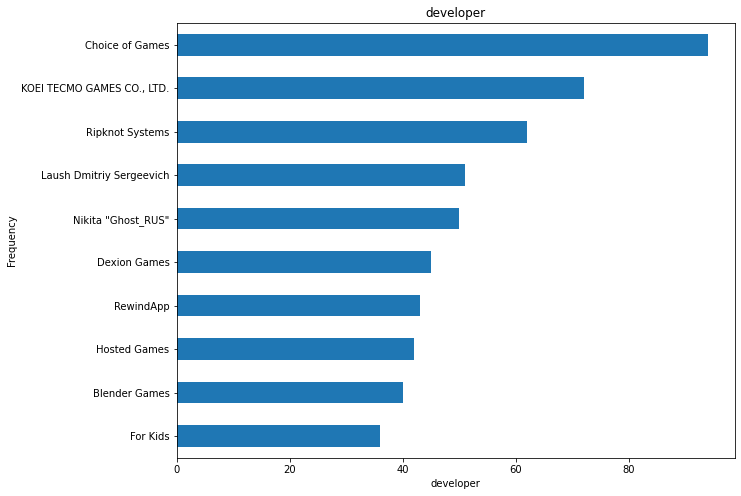

Total number of categories in developer: 17113
Choice of Games               94
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      51
Nikita "Ghost_RUS"            50
Dexion Games                  45
RewindApp                     43
Hosted Games                  42
Blender Games                 40
For Kids                      36
Name: developer, dtype: int64




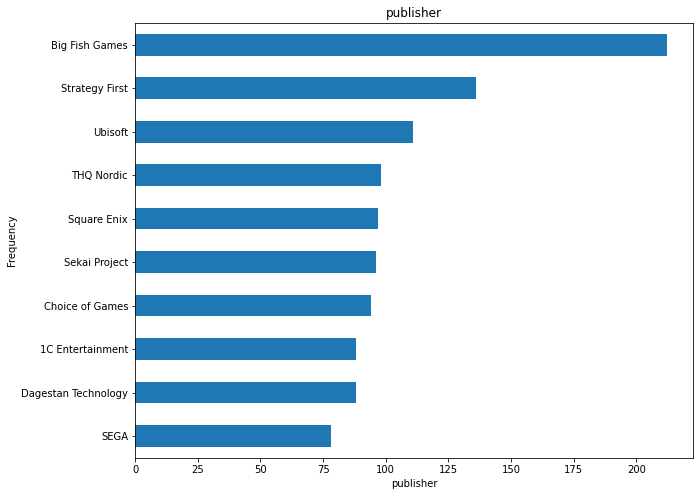

Total number of categories in publisher: 14354
Big Fish Games         212
Strategy First         136
Ubisoft                111
THQ Nordic              98
Square Enix             97
Sekai Project           96
Choice of Games         94
1C Entertainment        88
Dagestan Technology     88
SEGA                    78
Name: publisher, dtype: int64




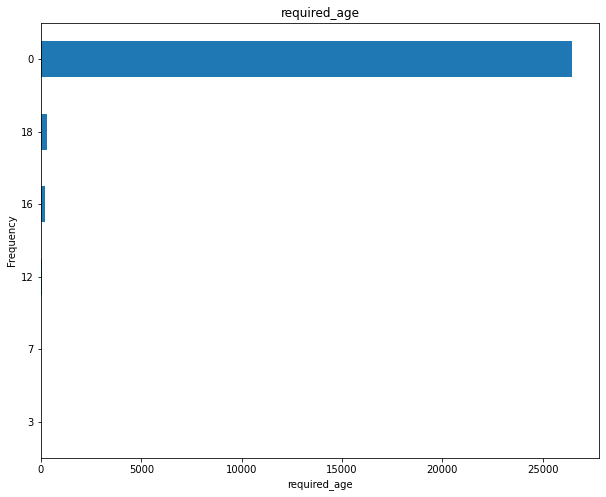

Total number of categories in required_age: 6
0     26479
18      308
16      192
12       73
7        12
3        11
Name: required_age, dtype: int64




In [50]:
# plot all categorical columns
# note: only the top 10 frequent categories are plotted
for col in cat_cols:
  plt.figure(figsize = (10, 8))
  tmp = steam[col].value_counts()
  tmp.head(10).plot(kind = 'barh')
  plt.gca().invert_yaxis()
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
  plt.show()
  print(f'Total number of categories in {col}: {len(tmp)}')
  print(tmp.head(10))
  print('\n')

The classes in `english` and `required_age` are very unbalanced. Almost all games are in English, and almost all games have no age limits. 

Can show the top publishers and developers in final visualizations.

### Numeric Columns

In [51]:
# numeric columns
num_cols = ['achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price']

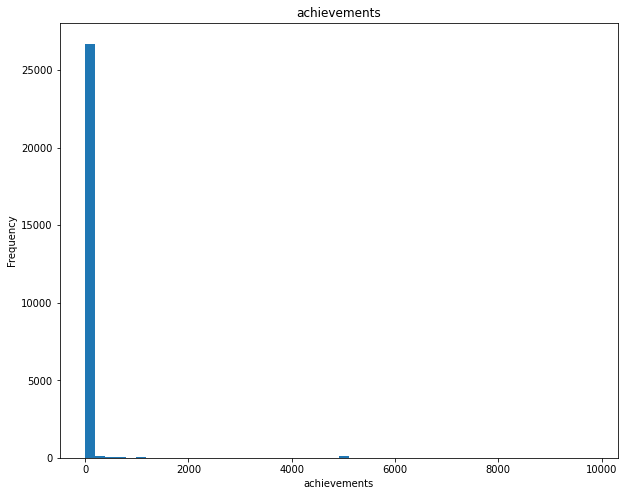

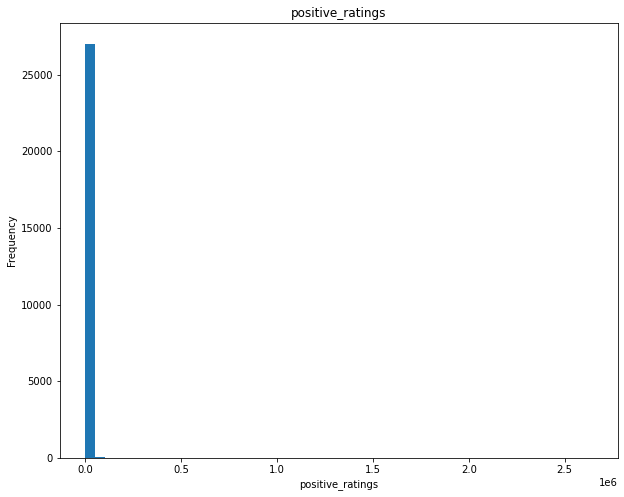

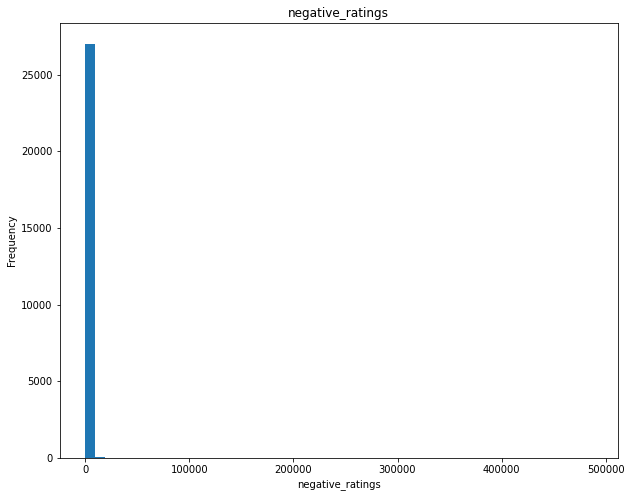

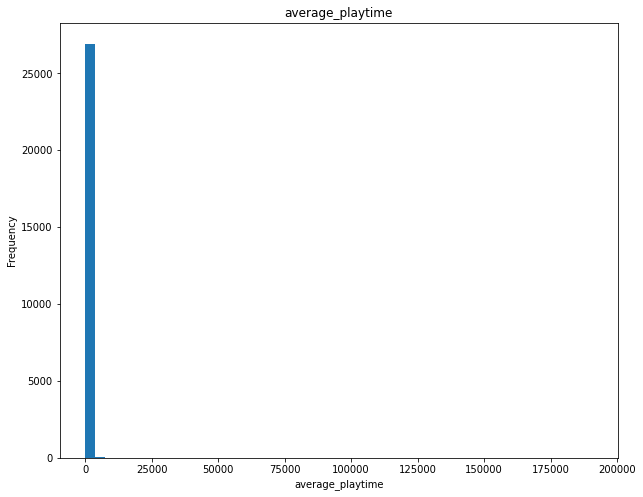

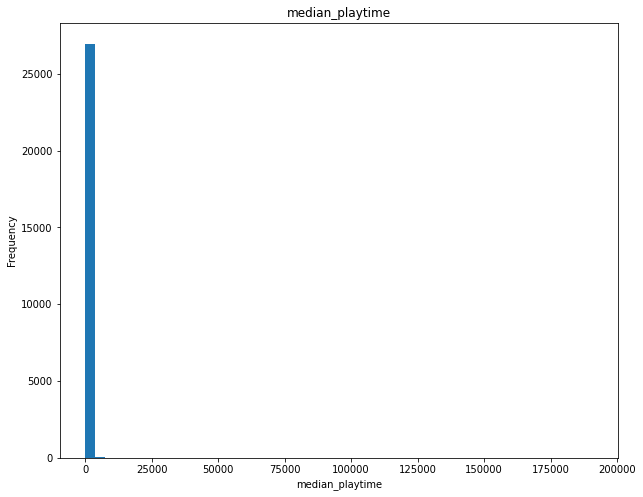

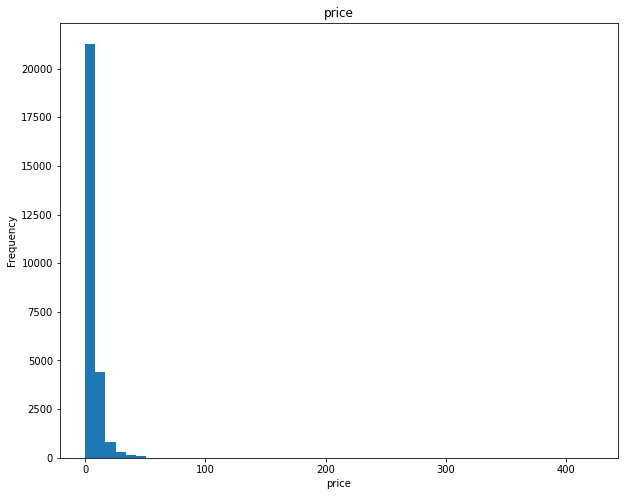

In [52]:
# visualize all numeric columns
for col in num_cols:
  plt.figure(figsize = (10, 8))
  steam[col].plot(kind = 'hist', bins = 50)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
  plt.show()
  print('\n')

Um. The data is extremely skewed. Let's exclude the outliers and zoom in..

In [53]:
# write a function to remove outliers
# In the definition of box plots, values < Q1 - 1.5 IQR and values > Q3 + 1.5 IQR are the outliers
def remove_outliers(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3-Q1
  data_outlier_excluded = data[(data >= Q1 - (1.5 * IQR)) & (data <= Q3 + (1.5 * IQR))]
  return data_outlier_excluded

#### `achievements`

In [54]:
# games with 0 achievements
len(steam[steam['achievements'] == 0])

11864

In [55]:
# at least 1 achievements
steam[steam['achievements'] != 0]['achievements'].sort_values(ascending = False)

12604    9821
14735    5394
17213    5000
22033    5000
20465    5000
         ... 
4515        1
26512       1
26507       1
10287       1
24500       1
Name: achievements, Length: 15211, dtype: int64

11864 games don't include any achivement.

There is a game with 9821 achievements! What is it?

In [56]:
# check the game with the most achievements
steam.loc[12604]

appid                                                          573060
name                                                       LOGistICAL
release_date                                      2017-02-15 00:00:00
english                                                             1
developer                                                      Sacada
publisher                                                      Sacada
platforms                                                     windows
required_age                                                        0
categories          [Single-player, Steam Achievements, Steam Trad...
genres                                      [Casual, Indie, Strategy]
steamspy_tags                                   Casual;Strategy;Indie
achievements                                                     9821
positive_ratings                                                  125
negative_ratings                                                   35
average_playtime    

It's a puzzle game! You get achievements by finishing parts of the puzzle..amazing

There are too many outliers to get a meaningful distribution. Let's remove the outliers.

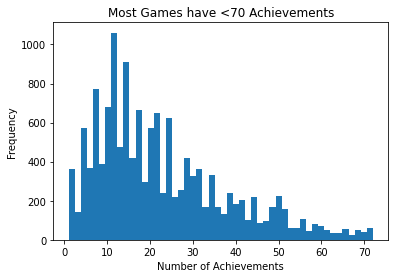

total games: 27075
games with non-zero achievements: 15211
games with non-zero achievements, outliers excluded: 14023


In [57]:
# exclude games with 0 achievements
none_0_ach = steam[steam['achievements'] != 0]['achievements']

# exclude the outliers
ach_ex = remove_outliers(none_0_ach)

# plot the distribution of achievements
plt.figure()
ach_ex.plot(kind = 'hist', bins = 50)
plt.xlabel('Number of Achievements')
plt.title('Most Games have <70 Achievements')
plt.show()

# conclusion
print('total games:', len(steam['achievements']))
print('games with non-zero achievements:', len(none_0_ach))
print('games with non-zero achievements, outliers excluded:', len(ach_ex))

About half of the games have no achievement system.

Most games have <70 achievements, while the champion has 9000+ achievements.

There's a small peak around 12 on the histogram.

#### `positive_ratings`

Let's look at the top 10 games with the most positive ratings.

In [58]:
# top 10 game by positive ratings
steam.sort_values(by = 'positive_ratings', ascending = False).head(10)[['name', 'positive_ratings']]

,name,positive_ratings
25,Counter-Strike: Global Offensive,2644404
22,Dota 2,863507
19,Team Fortress 2,515879
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,496184
121,Garry's Mod,363721
2478,Grand Theft Auto V,329061
1467,PAYDAY 2,308657
3362,Unturned,292574
1120,Terraria,255600
21,Left 4 Dead 2,251789


Now the distribution:

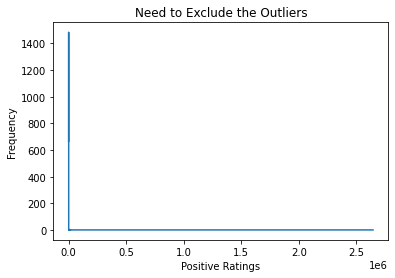

In [59]:
# plot the distribution of positive ratings
plt.figure()
steam['positive_ratings'].value_counts().sort_index().plot()
plt.xlabel('Positive Ratings')
plt.ylabel('Frequency')
plt.title('Need to Exclude the Outliers')
plt.show()

Um. Need to exclude outliers to make it human-interpretable.

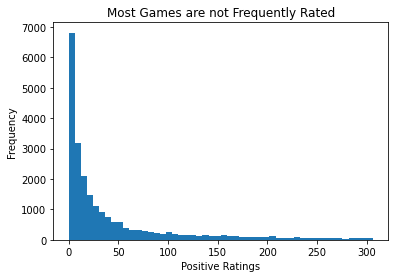

total games: 27075
games with positive ratings outliers excluded: 22789


In [60]:
# exclude outliers from positive_ratings
pos_r = steam['positive_ratings']
pos_r_ex = remove_outliers(pos_r)

# plot the distribution of positive ratings
plt.figure()
pos_r_ex.plot(kind = 'hist', bins = 50)
plt.xlabel('Positive Ratings')
plt.ylabel('Frequency')
plt.title('Most Games are not Frequently Rated')
plt.show()

# conclusion
print('total games:', len(pos_r))
print('games with positive ratings outliers excluded:', len(pos_r_ex))

This looks better.

Most Games are not frequently rated though.

#### `negative_ratings`

Top 10 with the most negative ratings

In [61]:
steam.sort_values(by = 'negative_ratings', ascending = False).head(10)[['name', 'negative_ratings']]

,name,negative_ratings
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,487076
25,Counter-Strike: Global Offensive,402313
22,Dota 2,142079
2478,Grand Theft Auto V,139308
7809,Z1 Battle Royale,91664
1506,DayZ,77169
4712,ARK: Survival Evolved,66603
5235,Tom Clancy's Rainbow Six® Siege,59620
1467,PAYDAY 2,56523
2563,No Man's Sky,56488


A LOT of overlap. Mostly because of popularity.

We should look at the ratio instead.

In [62]:
# ratio of positive/negative ratings
pos_neg_ratio = steam['positive_ratings'] / (steam['negative_ratings'] + 1) # +1 to avoid zero divisions
top_ratios_id = pos_neg_ratio.sort_values(ascending = False).head(5).index

steam.loc[top_ratios_id]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,owner_median
23296,888790,Sabbat of the Witch,2018-10-26,1,Yuzusoft,NekoNyan Ltd.,windows,0,"[Single-player, Steam Achievements, Steam Trad...","[Adventure, Casual, Simulation]",Visual Novel;Sexual Content;Nudity,20,521,2,0,0,0-20000,23.79,10000.0
25913,992740,祈風 Inorikaze,2019-02-13,0,Twilight -日月之境-;觀象草圖 Astrolabe Draft,觀象草圖 Astrolabe Draft,windows,0,"[Single-player, Steam Achievements, Steam Cloud]","[Adventure, Casual, Indie]",Adventure;Indie;Casual,20,114,0,75,75,0-20000,8.29,10000.0
8548,454380,Champions of Breakfast,2016-06-23,1,Pirate Software,Pirate Software,windows;linux,0,"[Single-player, Steam Achievements, Full contr...","[Action, Indie]",Action;Indie;Bullet Hell,164,112,0,0,0,0-20000,2.09,10000.0
26780,1037190,Shipped,2019-03-28,1,Majorariatto,Majorariatto,windows;mac;linux,0,"[Single-player, Multi-player, Local Multi-Play...","[Action, Casual, Indie, Sports]",Casual;Indie;Action,11,296,2,0,0,0-20000,5.20,10000.0
19998,790060,The Void Rains Upon Her Heart,2018-02-14,1,Veyeral Games,The Hidden Levels,windows,0,"[Single-player, Steam Achievements, Full contr...","[Action, Indie, Early Access]",Early Access;Action;Indie,235,98,0,0,0,0-20000,7.19,10000.0


Now these games have high ratios but are not very popular..

Should still consider the total number of ratings at ranking!

Final solution: rank with number of positive ratings, but show negative ratings for these games at the same time. 

See the Tableau file for visualization.

#### `price`

In [63]:
# free games
steam[steam['price'] == 0].shape[0]

2560

In [64]:
# pricy games
steam.sort_values(by = 'price', ascending = False).head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,owner_median
21105,821800,ADR-Labelling Game,2018-04-12,1,Suomen Kuljetusturva Oy,Suomen Kuljetusturva Oy,windows,0,[Single-player],[Simulation],Simulation;Difficult,0,1,0,0,0,0-20000,421.99,10000.0
13062,585610,GameMaker Studio 2 UWP,2017-03-08,1,YoYo Games Ltd.,YoYo Games Ltd.,windows;mac,0,[In-App Purchases],"[Animation & Modeling, Design & Illustration, ...",Game Development;Design & Illustration;Utilities,0,1,0,0,0,0-20000,303.99,10000.0
10034,502570,Houdini Indie,2018-10-10,1,SideFX,SideFX,windows,0,"[Partial Controller Support, Steam Cloud]","[Animation & Modeling, Design & Illustration, ...",Animation & Modeling;Game Development;3D,0,23,0,0,0,0-20000,209.99,10000.0
14917,648070,CrisisActionVR,2017-09-11,1,Pixel Wonder,Pixel Wonder,windows,0,"[Single-player, Multi-player, Online Multi-Pla...","[Violent, Gore, Action, Adventure, Indie, Mass...",Massively Multiplayer;Indie;Action,20,14,10,0,0,0-20000,154.99,10000.0
25568,977200,Bible Test,2018-11-27,1,FIRST_UKRAINIAN,FIRST_UKRAINIAN,windows,0,"[Single-player, Steam Achievements]","[Adventure, Casual, Indie, Simulation]",Indie;Casual;Adventure,5,24,6,0,0,0-20000,154.99,10000.0


Well, people don't seem to like to pay for such pricy games!

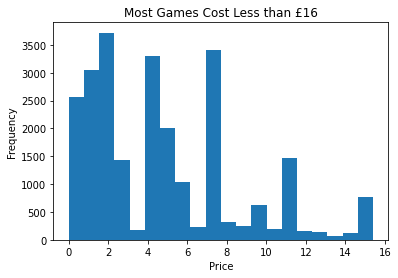

total games: 27075
games with price outliers excluded: 25100


Note: the price data was collected in £.


In [65]:
# exclude the outliers in price
price = steam['price']
price_ex = remove_outliers(price)

# plot the distribution of price
plt.figure()
price_ex.plot(kind = 'hist', bins = 20)
plt.xlabel('Price')
plt.title('Most Games Cost Less than £16')
plt.show()

# conclusion
print('total games:', len(steam))
print('games with price outliers excluded:', len(price_ex))
print('\n')
print('Note: the price data was collected in £.')

Most games are cheap.. 

But also, most games are not played much. 

What's the distribution of prices for games with non-zero playtime?

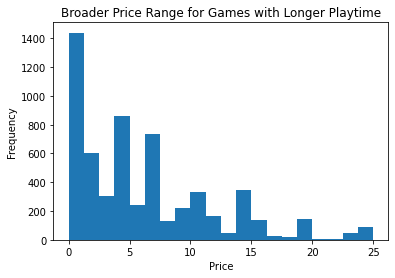

In [66]:
# plot the distribution of prices for games with non-zero playtime
plt.figure()
remove_outliers(steam[steam['average_playtime'] != 0]['price']).plot(kind = 'hist', bins = 20)
plt.xlabel('Price')
plt.title('Broader Price Range for Games with Longer Playtime')
plt.show()

After excluding the games with unnoticable playtime, the upper bound of price distribution is higher. 

As long as the game is interesting, players will be willing to spend more time as well as money on it!

### Further EDA

#### Revenue by release date

In [67]:
# calculate revenue by release date, owner_median, and price for each game
sales = pd.DataFrame()
sales['revenue'] = steam['owner_median'] * steam['price'] 

# label the release year-month of each game
sales['release_month'] = steam['release_date'].apply(lambda x: x.strftime("%Y-%m"))
sales

,revenue,release_month
0,107850000.0,2000-11
1,29925000.0,1999-04
2,29925000.0,2003-05
3,29925000.0,2001-06
4,29925000.0,1999-11
...,...,...
27070,20900.0,2019-04
27071,16900.0,2019-04
27072,39900.0,2019-04
27073,51900.0,2019-04


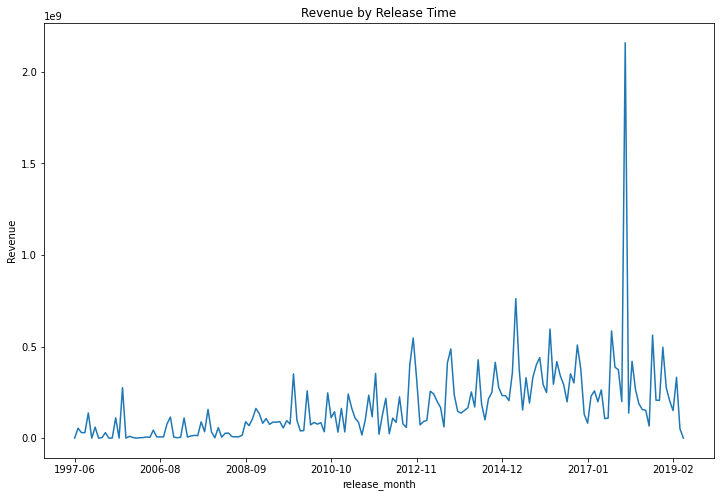

In [68]:
# plot sales amount by release week
plt.figure(figsize = (12, 8))
sales.groupby('release_month').sum()['revenue'].plot()
plt.ylabel('Revenue')
plt.title('Revenue by Release Time')
plt.show()

What happened at the end of 2017??

In [69]:
# attach the name column to find the games with highest revenue
sales.index = steam['name']
sales.sort_values(['revenue'], ascending = False).head()

,revenue,release_month
name,,
PLAYERUNKNOWN'S BATTLEGROUNDS,2.024250e+09,2017-12
MONSTER HUNTER: WORLD,3.749250e+08,2018-08
Grand Theft Auto V,3.748500e+08,2015-04
ARK: Survival Evolved,3.374250e+08,2017-08
HITMAN™ 2,3.374250e+08,2018-11


It's PUBG!

There isn't a very obvious trend of "games become more and more porfitable" over the years.. but maybe the yearly sales are going up. We just don't have the data for that. We can only estimate based on the release date, but people buy good games after they are released for years. 

#### Sales amount by game

Note: some popular games are cheap/free, but there's payable DLC or upgrade available and we don't have data on how many owners purchased these contents. e.g. CSGO

<Figure size 432x288 with 0 Axes>

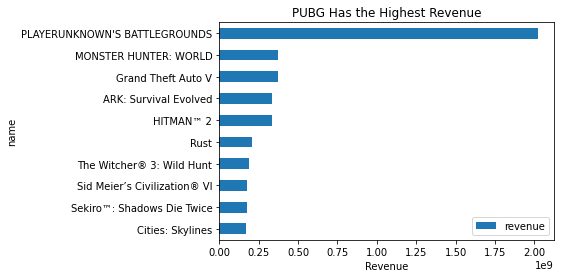

In [70]:
# visualize the games with highest revenue
plt.figure()
sales.sort_values(by = 'revenue', ascending = False).head(10).plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Revenue')
plt.title('PUBG Has the Highest Revenue')
plt.show()

<Figure size 432x288 with 0 Axes>

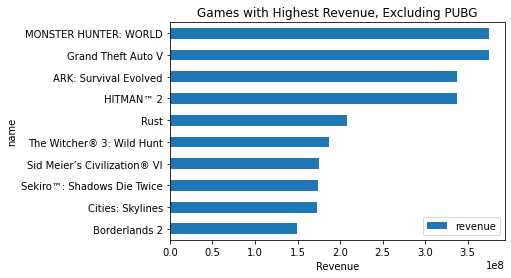

In [71]:
# exclude PUBG to zoom in on the rest
plt.figure()
sales.sort_values(by = 'revenue', ascending = False).head(11)[1:].plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Revenue')
plt.title('Games with Highest Revenue, Excluding PUBG')
plt.show()

## `steam_description`

There are 3 description columns in this table.

`detailed_description` and `about_the_game` are mostly identical.

In [72]:
print('Number of games with detailed_description and about_the_game the same:')
len(steam_description[steam_description['detailed_description'] == steam_description['about_the_game']])

Number of games with detailed_description and about_the_game the same:


24671

The detailed description is on average 9.6x longer than the short one.

In [73]:
# compare the length of detailed/short description
print('The detailed description is this many times longer than the short description:')
round((steam_description['detailed_description'].str.len() / steam_description['short_description'].str.len()).mean(), 1)

The detailed description is this many times longer than the short description:


9.6

### NLP 
Let's do NLP (natural language processing) on `short_description` to get the most popular words in the descriptions.

In [74]:
# clean the descriptions

# strip html
import re
steam_description['short_description'] = steam_description['short_description'].apply(lambda x: re.sub('<[^<]+?>', '', x))
steam_description['short_description'] = steam_description['short_description'].apply(lambda x: x.replace('&quot', '').replace('\r\n', ''))

# convert to lowercase
steam_description['short_description'] = steam_description['short_description'].apply(lambda x: x.lower())

In [75]:
# vectorize the words (top 100 with highest frequency)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english', min_df = 5, max_features = 100)
cv.fit(steam_description['short_description'])
short_des_transformed = cv.transform(steam_description['short_description'])

In [76]:
# extract the information and put it in a dataframe
short_des_vectorized = pd.DataFrame(columns = cv.get_feature_names_out(), 
                                    data = short_des_transformed.toarray())
short_des_vectorized.head(2)

,2d,3d,action,adventure,amp,arcade,based,battle,best,build,...,turn,unique,use,using,virtual,vr,war,way,weapons,world
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0


In [77]:
# count the occurrence of each word (token)
tokens = short_des_vectorized.sum(axis = 0).sort_values(ascending = False)
tokens

game         12407
world         5216
new           2959
play          2856
adventure     2587
             ...  
challenge      637
single         625
shoot          620
epic           605
love           591
Length: 100, dtype: int64

In [78]:
# join the tokens into one string
tokens_str = ' '.join(tokens.index)
tokens_str

'game world new play adventure action time puzzle way experience based vr story players fight player space shooter explore set unique like life games battle levels enemies rpg different classic strategy help make arcade fast build platformer use multiplayer friends person puzzles survive control style war fun save real combat gameplay weapons 2d city survival turn journey 3d online paced need virtual simple just escape create evil elements old mysterious collect dark challenging level skills power best horror series solve inspired monsters try using team amp fantasy reality discover characters place free open high role challenge single shoot epic love'

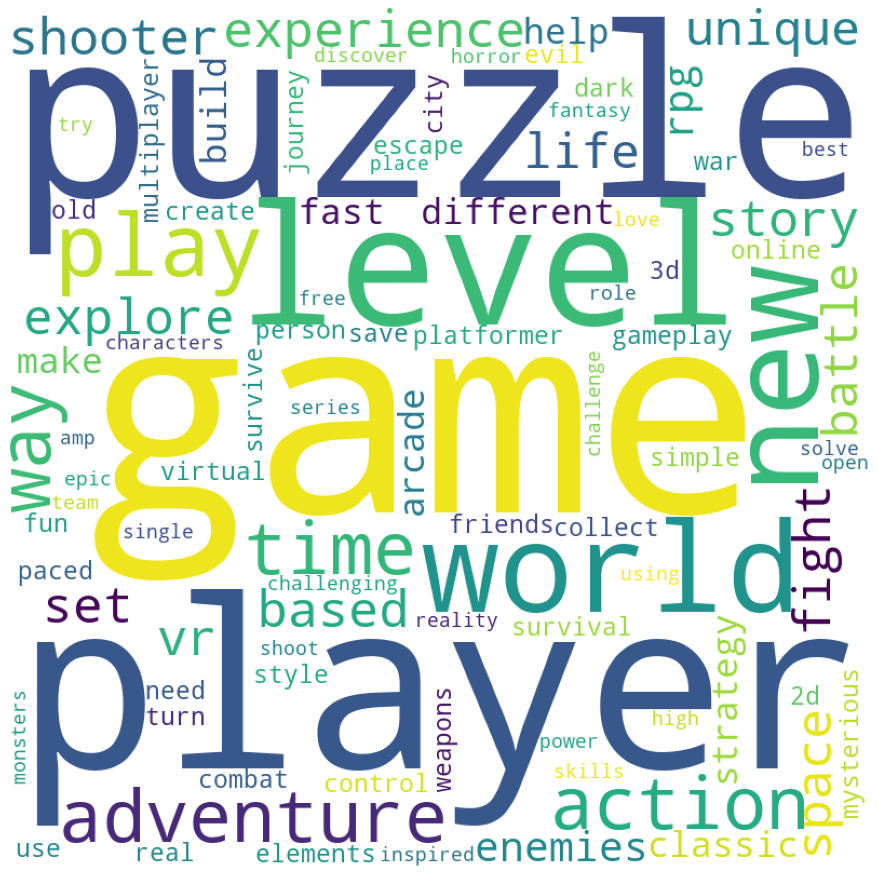

In [79]:
# create a word cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tokens_str)
 
# plot the word cloud image                      
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Some words should be removed from the list to improve the image quality e.g. `game`, `player`..

Let's try for the top 100 popular games.

In [80]:
# id of the top 100 games by positive ratings
top_100_id = steam.sort_values(by = 'positive_ratings', ascending = False).head(100)['appid']
top_100_id.values

array([   730,    570,    440, 578080,   4000, 271590, 218620, 304930,
       105600,    550, 359550, 252950,  72850, 230410, 252490, 292030,
       227300, 444090, 346110,  49520, 381210,    620,   8930,     10,
       319630, 221100, 413150, 433850, 242760, 377160, 322330, 698780,
       107410, 374320, 391540, 203160, 222880, 264710, 236390, 301520,
         8870, 239140,    240,  48700, 211820, 291550, 250900, 582010,
       238960, 379720,    220, 255710,  22380, 227940, 431960, 275850,
       232090, 251570, 244850, 206420, 221380,   1250, 322170,    400,
       219640, 204360, 365590, 220200, 391220, 224260, 427520, 304050,
       489830, 238460, 282070, 220240, 238320, 265930, 305620, 219150,
        55230, 435150, 333930, 113200, 212680, 363970, 206440, 205100,
       262060, 504370, 236850, 367520, 755790, 524220, 289070, 268910,
       287700, 294100, 225540, 200510])

In [81]:
# short description of the top 100 games
top_100_des = pd.merge(top_100_id, steam_description, left_on = 'appid', right_on = 'steam_appid', how = 'left')['short_description']
top_100_des

0     counter-strike: global offensive (cs: go) expa...
1     every day, millions of players worldwide enter...
2     nine distinct classes provide a broad range of...
3     playerunknown's battlegrounds is a battle roya...
4     garry's mod is a physics sandbox. there aren't...
                            ...                        
95    cuphead is a classic run and gun action game h...
96    ushering in a new era for the metal gear franc...
97    a sci-fi colony sim driven by an intelligent a...
98    with over 1000 km² of complete freedom from sk...
99    the xcom: enemy unknown - slingshot pack is no...
Name: short_description, Length: 100, dtype: object

In [82]:
# vectorize the top 100 words with highest frequency
cv = CountVectorizer(stop_words = 'english', min_df = 5, max_features = 100)
cv.fit(top_100_des)
top_100_des_transformed = cv.transform(top_100_des)

# extract the information and put it in a data frame to make it easier to see what has occured
top_100_des_vectorized = pd.DataFrame(columns = cv.get_feature_names_out(), 
                                    data = top_100_des_transformed.toarray())
top_100_des_vectorized.head(2)

,acclaimed,action,adventure,award,based,battle,build,city,classic,combat,...,survive,team,ultimate,war,way,weapons,welcome,winning,world,year
0,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# count the occurrence of each word (token)
tokens = top_100_des_vectorized.sum(axis = 0).sort_values(ascending = False)
tokens

game           42
new            24
world          19
action         19
play           18
players        16
survival       14
free           13
explore        12
survive        12
experience     12
battle         12
player         10
multiplayer    10
shooter        10
person         10
team            9
set             9
friends         8
life            8
fight           8
war             8
based           8
open            8
dark            7
horror          7
way             7
city            7
build           7
mysterious      7
online          7
weapons         7
rpg             6
year            6
op              6
combat          6
adventure       6
gameplay        6
epic            6
don             6
winning         5
welcome         5
award           5
classic         5
discover        5
ultimate        5
like            5
driven          5
enemy           5
latest          5
acclaimed       5
dtype: int64

# Conclusion

Table `steam` has the most information valuable for visualization. The Tableau visualization will include: 
* `categories`: most popular categories
* `genres`: most popular genres
* `owners`: most owned game, distribution of game owners
* `release_date`: total games released, releases by year, highest daily releases
* `developer`: developers released most games
* `publisher`: publishers released most games
* `positive_ratings` & `negative_ratings`: average pos:neg ratio, top games by positive ratings with negative ratings shown at the side
* `average_playtime` & `median_playtime`: most played game, distribution of playtime
* total revenue, revenue by release date

Table `steam_description` can be studied with NLP to extract the most frequent words used in popular games, in order to show possible trends.
* Columns `detailed_description` and `about_the_game` are mostly identical
* `short_description` is more concise and will be used for extraction.

Table `steamspy_tag` will be used to visualize the most popular tags voted by community.


The information in tables `steam_description` and `steamspy_tag` will be first processed by a python file. The output files will then be visualized in Tableau.

See my Git Hub for the full work:

https://github.com/aaw707/Steam-Games-Visualization